# **ASSIGNMENT 3**
---

# **Name:** Prashant Agheda
# **PRN No:** 20210804004
# **Subject:** Advanced AI

---

## **Topic:** LOW-LEVEL FEATURE EXTRACTION.

## **Aim:** To study and perform low-level feature extraction on image data.

### **Steps To Perform:**

## **A. Edge Detection using Prewitt filter.**


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

from skimage.io import imread,imshow
from skimage.filters import *
from skimage.color import rgb2gray,rgba2rgb
from skimage.feature import blob_log

In [ ]:
# Reading image data.

originalImage = imread('/content/Vegetable_Image.png')
grayImage = rgb2gray(rgba2rgb(originalImage))

originalImage = originalImage[28:412, 88:600]
grayImage = grayImage[28:412, 88:600]

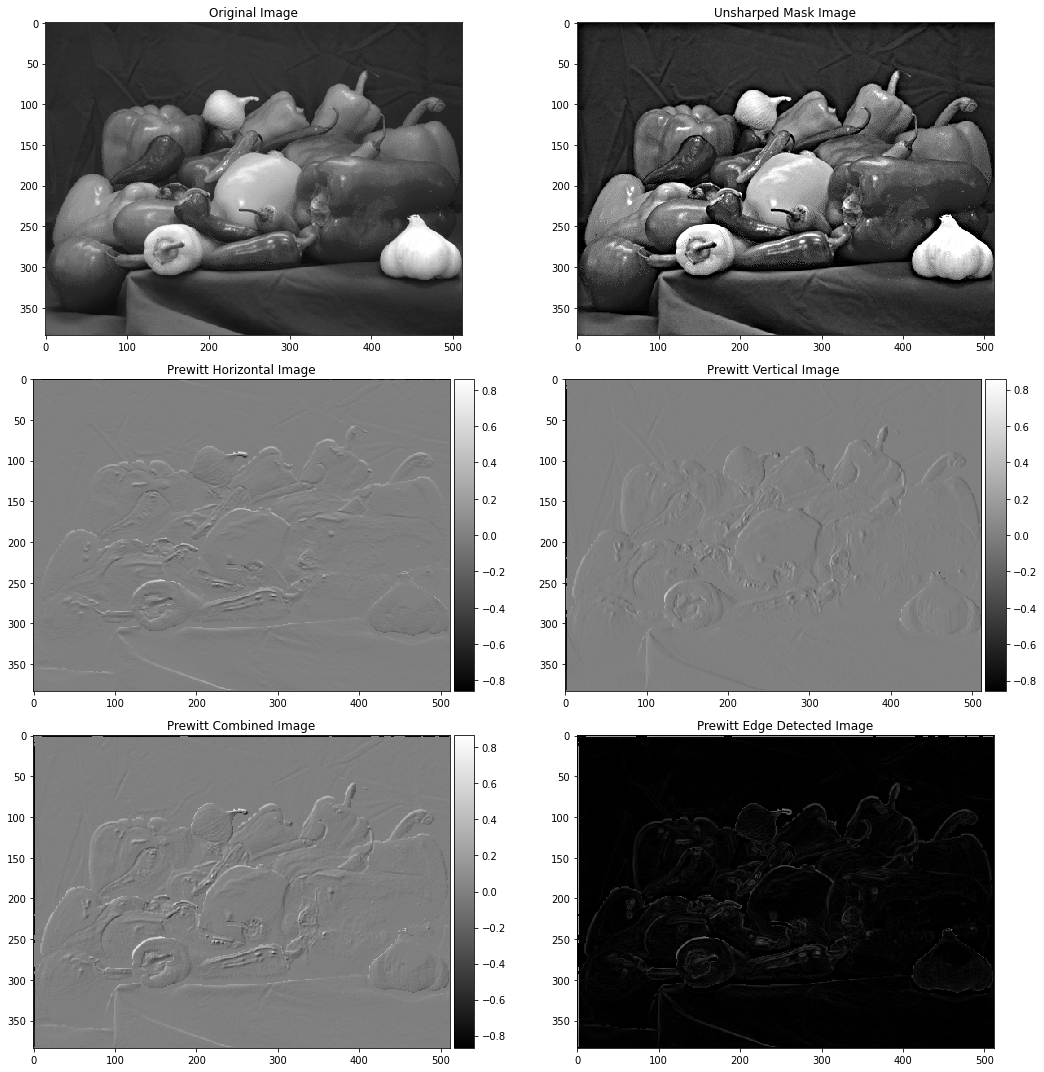

In [ ]:
mask = unsharp_mask(grayImage,radius=5,amount=1.0)

fig, ax = plt.subplots(3,2)
fig.set_size_inches(15,15)

imshow(grayImage, ax=ax[0,0])
ax[0,0].set_title("Original Image")

imshow(mask, ax=ax[0,1])
ax[0,1].set_title("Unsharped Mask Image")

# Prewitt Horizontal Mask.
prewittHorizontal = prewitt_h(grayImage, mask)
imshow(prewittHorizontal, ax=ax[1,0], cmap="gray")
ax[1,0].set_title("Prewitt Horizontal Image")

prewittVertical = prewitt_v(grayImage,mask)
imshow(prewittVertical, ax=ax[1,1], cmap="gray")
ax[1,1].set_title("Prewitt Vertical Image")

imshow(prewittVertical + prewittHorizontal, ax=ax[2,0], cmap="gray")
ax[2,0].set_title("Prewitt Combined Image")

prewittGray = prewitt(grayImage, mask)
imshow(prewittGray, ax=ax[2,1], cmap="gray")
ax[2,1].set_title("Prewitt Edge Detected Image")

plt.show()

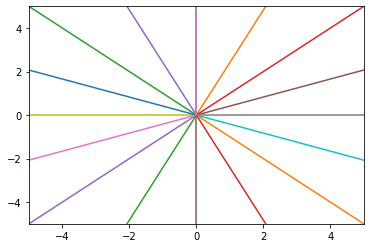

In [ ]:
# Reference for non max supression
x = np.arange(20)
y = x/np.tan(np.deg2rad(45))

angleRanges = np.linspace(0,180,9)
for i in angleRanges:
  y = np.tan(np.deg2rad(i))
  
  if(y == 0):
    plt.plot(len(x)*[0],x)
  else:
    y = x/np.tan(np.deg2rad(i))
    plt.plot(x, y)
    plt.plot(-x, -y)
  
  plt.xlim(-5.0, 5.0)
  plt.ylim(-5.0, 5.0)

plt.show()

## **Observations:**

- **Prewitt operator or filter is used to Detect the Edges from Image.**

- **Un-sharpening mask with kernal of 5x5 is applied before working with prewitt operator.**

- **Horizontal and Vertical edges are detected and combined to get complete edges**



---



## **B. Canny edge detection.**

This includes 4 step process

1. Noise Reduction from image.
2. Finding intesity gradient $G_x$ and $G_y$.
* Edge_Gradient $(G)=  \sqrt{G2_x+G2_y}$

* Angle $(θ) = tan^{−1}(\frac{G_y}{G_x})$
3. Non-Max supression.
4. Hysteresis thresholding.

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


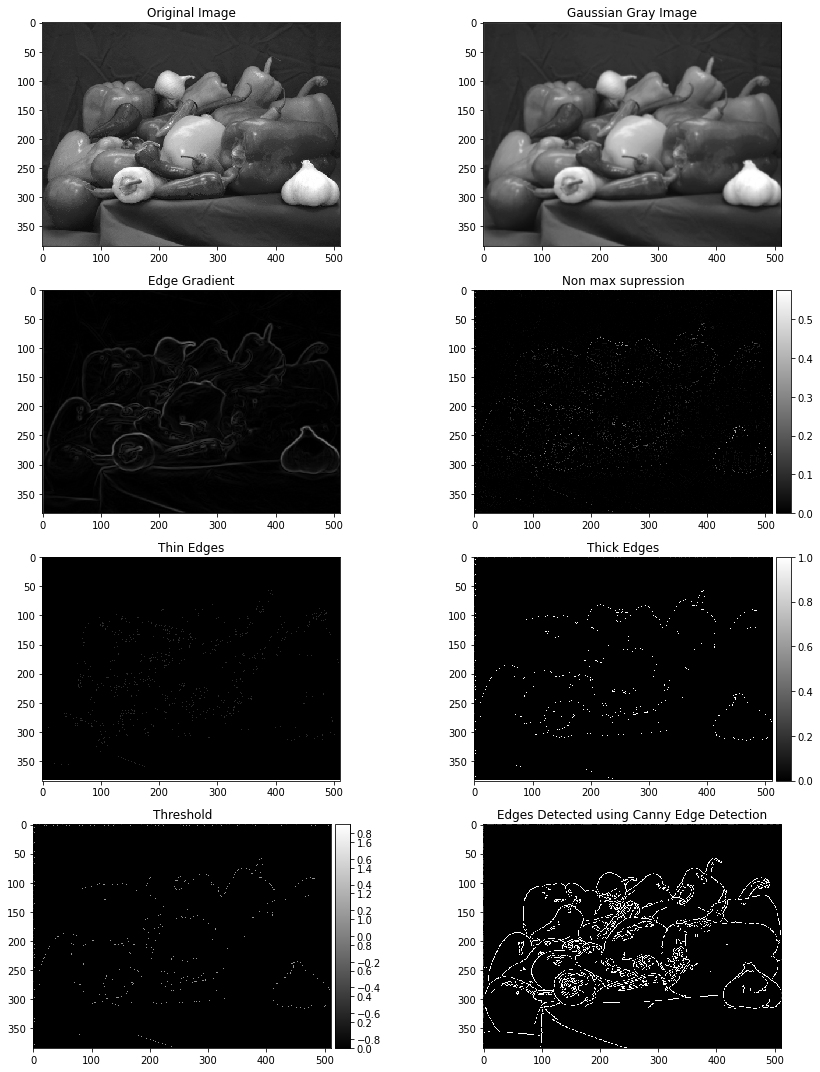

In [ ]:
# Using Gaussian blur.
gaussianGray = gaussian(grayImage)
fig2, ax2 = plt.subplots(4,2)
fig2.set_size_inches(15,15)

imshow(grayImage, ax=ax2[0,0])
imshow(gaussianGray, ax=ax2[0,1])
ax2[0,0].set_title("Original Image")
ax2[0,1].set_title("Gaussian Gray Image")

# Finding intensity gradient and angle.
gradientX = prewitt_h(gaussianGray)
gradientY = prewitt_v(gaussianGray)

gradient = np.zeros(gradientX.shape)
angle = np.zeros(gradientX.shape)

for i in range(gradientX.shape[0]):
  for j in range(gradientY.shape[1]):
    gradient[i,j] = (gradientX[i,j]**2 + gradientY[i,j]**2)**0.5
    angle[i,j] = np.arctan2(gradientY[i,j], gradientX[i,j])

imshow(gradient, ax=ax2[1,0], cmap="gray")
ax2[1,0].set_title("Edge Gradient")


# Non max supression
tan = np.arctan2(gradientY, gradientX)
angleDegree = np.rad2deg(angle)

# Making negative angle positive.
angleDegree[angleDegree < 0] += 180


def getEdges(x,y):
  p = q = 255
  try:
    if 0 <= angleDegree[x,y] <= 22.5 or 157.5 <= angleDegree[x,y] <= 180:
      p = gradient[x,y+1]
      l = gradient[x,y-1]

    elif 22.5 <= angleDegree[x,y] <= 67.5:
      p = gradient[x-1,y+1]
      l = gradient[x+1,y-1]

    elif 67.5 <= angleDegree[x,y] <= 112.5:
      p = gradient[x-1,y]
      l = gradient[x+1,y]

    elif 112.5 <= angleDegree[x,y] <= 157.5:
      p = gradient[x+1,y+1]
      l = gradient[x-1,y-1]


    if(p <= gradient[x,y] and l <= gradient[x,y]):
      return gradient[x,y]
    else:
      return 0
      
  except IndexError as error:
    return 0


z = np.zeros(gradientX.shape)
for i in range(gradientX.shape[0]):
  for j in range(gradientY.shape[1]):
    z[i,j] = getEdges(i,j)

imshow(z, ax=ax2[1,1], cmap="gray")
ax2[1,1].set_title("Non max supression")

high = 0.13
low = 0.06

weakX, weakY = np.where((z >= low) & (z <= high))
strongX, strongY = np.where(gradient > high)

thick = np.zeros(z.shape)
thick[strongX, strongY] = 255/(z.max()*255)

thin = np.zeros(z.shape,)
thin[weakX, weakY] = 25/(z.max()*255)

thickAndThin = np.zeros(z.shape)
thickAndThin[weakX, weakY] = 25/(z.max()*255)
thickAndThin[strongX, strongY] = 255/(z.max()*255)

imshow(thin, ax=ax2[2,0], cmap="gray")
ax2[2,0].set_title("Thin Edges")

imshow(thickAndThin, ax=ax2[3,0], cmap="gray")
ax2[3,0].set_title("Double Threshold")


high = 0.13
low = 0.06
lowThreshold = (z > low).astype(int)
highThreshold = (z > high).astype(int)

edgeSobelHysteresis = apply_hysteresis_threshold(gradient, lowThreshold, highThreshold)

imshow(highThreshold, ax=ax2[2,1], cmap="gray")
ax2[2,1].set_title("Thick Edges")

imshow(high-edgeSobelHysteresis, cmap="gray", ax=ax2[3,0])
ax2[3,0].set_title("Threshold")


edges = cv2.Canny(originalImage, 100, 200)
imshow(edges, ax=ax2[3,1])
ax2[3,1].set_title("Edges Detected using Canny Edge Detection")

plt.show()

## **Observations:**

- **Canny edge detection is implemented using manual method and opencv library by perfoming the following steps:**
  1. **Noise reduction.**
  2. **Gradient calculation and Angle detection.**
  3. **Non max supression.**
  4. **Hysteresis thresholding.**



---



## **C. Laplacian of Gaussian.**

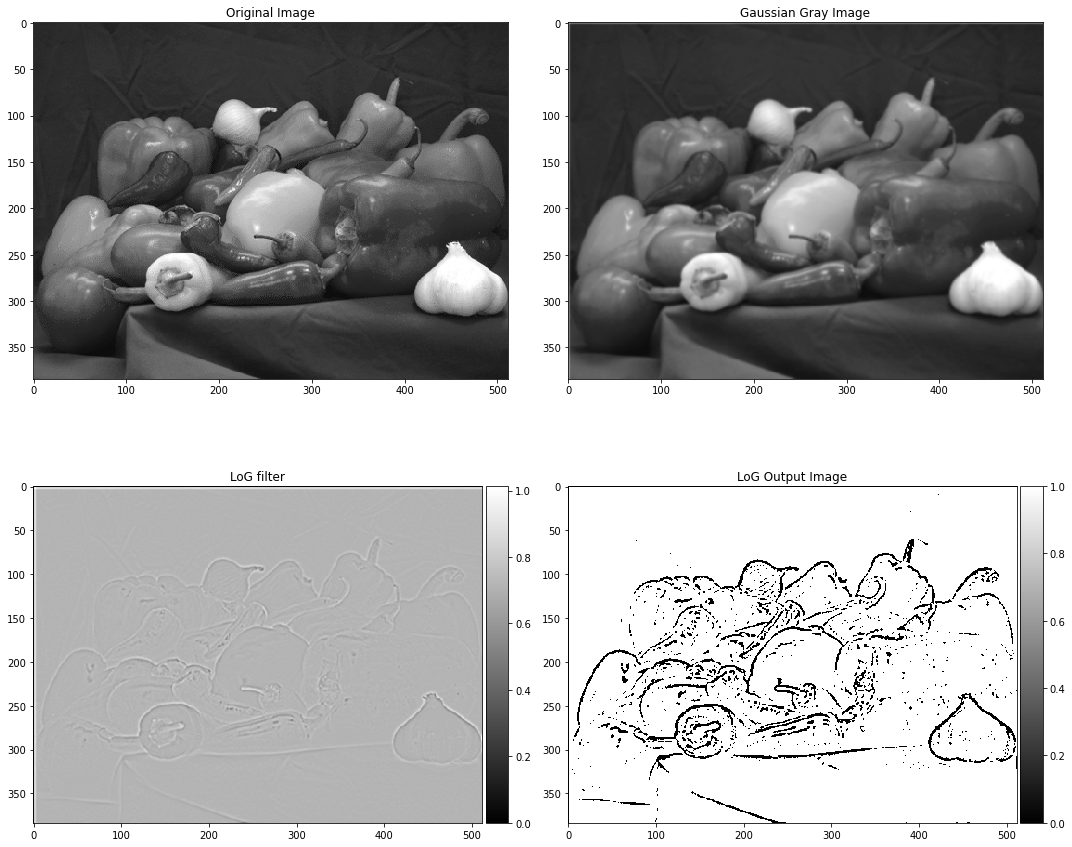

In [ ]:
# Applying Gaussian filter.
gaussianGray = gaussian(grayImage)

# Applying LOG filter.
logGray = cv2.Laplacian(gaussianGray, cv2.CV_64F)

img, ax3 = plt.subplots(2,2)
img.set_size_inches(15,15)

ax3[0,0].title.set_text("Original Image")
imshow(grayImage, ax=ax3[0,0], cmap="gray")

ax3[0,1].title.set_text("Gaussian Gray Image")
imshow(gaussianGray, ax=ax3[0,1])

logGray = logGray + abs(logGray.min())

ax3[1,0].title.set_text("LoG filter")
imshow(logGray, ax=ax3[1,0], cmap="gray")


z = (logGray > 0.7).astype(int)
ax3[1,1].title.set_text("LoG Output Image")
imshow(z, ax=ax3[1,1], cmap="gray")

plt.show()

## **Observations:**

- **Laplace of gaussian (LoG) operator is implemented using two step process:**
  1. **Noise reduction using gaussian of grayscale image.**
  2. **Taking Laplace of gaussian to cross zero-crossing rate by taking second order derivative linear process.**



---



## **D. Perform and comparison between Gradient-based and Gaussian-based operators.**

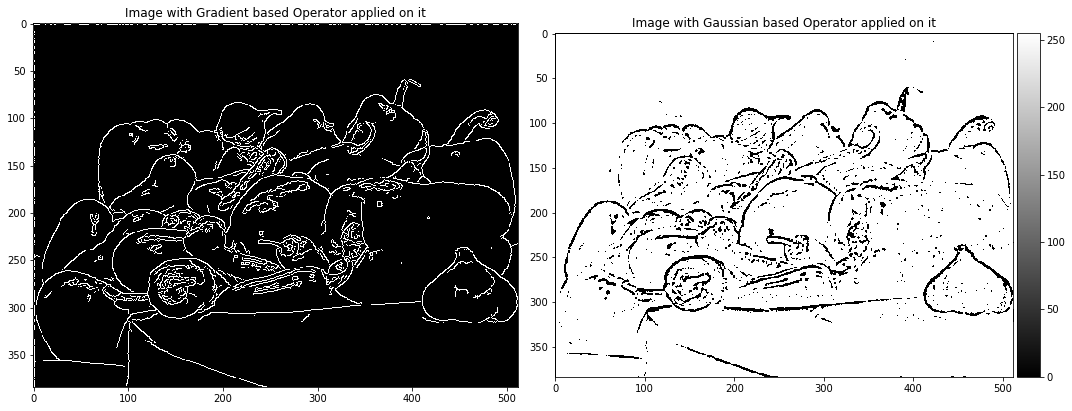

In [ ]:
fig4, ax4=plt.subplots(1,2)
fig4.set_size_inches(15,15)
ax4[0].set_title("Image with Gradient based Operator applied on it")
imshow(edges, ax=ax4[0])
ax4[1].set_title("Image with Gaussian based Operator applied on it")
imshow(z*255, ax=ax4[1], cmap="gray")

plt.show()

## **Observations:**

- **Comparison between gradient-based and gaussian-based tells us that gaussian-based filter are prone to Noise.**
- **Gradient based operators include: Sobel, Prewitt and Robert operators.**
- **Gaussian based operators include: Canny Edge and LoG.**



---

